# Indonesia's Bank Stocks Visualization

## Project Objective
In this project, these are the objectives aimed to achieve

1. What is the maximum and minimum closing price for each bank stock during the specified period?
2. On which specific dates did each bank stock reach its maximum and minimum return values?
3. What is the average return for each bank stock over the analyzed period?
4. Which bank stock is the most volatile, and which is the most stable, based on their standard deviation of returns?
5. What is the correlation between each pair of bank stocks, and how strong are these relationships?

# Installations
1. Install pandas-datareader: it is a Python library that allows easy access to financial data from various online sources directly into Pandas dataframes
2. Install Yahoo Finance: it is needed to fetch data from Yahoo Finance, which is a popular and comprehensive source of historical market data from Yahoo Finance which provides a wide range of financial data, including stock prices, dividends, and splits

# Import Libraries

In [170]:
import pandas_datareader.data as web
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline
sns.set_style('whitegrid')

# For Plotly
import plotly
import cufflinks as cf
cf.go_offline()

# Data
In this project, pandas data reader is needed to retrieve the historical data from Yahoo Finance. These are the Indonesia's Bank Stocks used in this project:

* PT Bank Central Asia Tbk (BBCA.JK)
* PT Bank Mandiri (Persero) Tbk (BMRI.JK)
* PT Bank Mega Tbk (MEGA.JK)
* PT Bank Negara Indonesia (Persero) Tbk (BBNI.JK)
* PT Bank Permata Tbk (BNLI.JK)
* PT Bank CIMB Niaga Tbk (BNGA.JK)


The stock data gathered are from Dec 31st 2013 to Dec 31st 2023

# Processing

In [267]:
# define the start - end date
start_date = datetime.datetime(2013, 12, 31).strftime('%Y-%m-%d')
end_date = datetime.datetime(2023, 12, 31).strftime('%Y-%m-%d')

In [174]:
# list of Indonesian bank stock tickers
bank_tickers = ['BBCA.JK', 'BBRI.JK', 'BMRI.JK', 'BNLI.JK', 'BBNI.JK', 'BNGA.JK', 'MEGA.JK']

In [175]:
# create an empty dictionary to store data
stock_data = {}

In [176]:
# create a loop from Yahoo Finance to Bank Tickers
for ticker in bank_tickers:
    stock_data[ticker] = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [177]:
# combine all stock data into a single df with multiindex columns (axis=1)
df_stock = pd.concat(stock_data, axis=1)

In [178]:
# set the column names to have multiindex with 'Bank Ticker' and 'Stock Info'
df_stock.columns.names = ['Bank Ticker', 'Stock Info']

In [179]:
# checking (Bank Ticker and Stock Info should be multiindex
df_stock.head()

Bank Ticker BBCA.JK                                                 \
Stock Info     Open    High     Low   Close    Adj Close    Volume   
Date                                                                 
2014-01-02   1940.0  1970.0  1930.0  1960.0  1649.077759  33065000   
2014-01-03   1940.0  1950.0  1870.0  1900.0  1598.595581  71912500   
2014-01-06   1880.0  1900.0  1860.0  1870.0  1573.354858  58190000   
2014-01-07   1870.0  1890.0  1865.0  1875.0  1577.561646  36152000   
2014-01-08   1880.0  1890.0  1850.0  1865.0  1569.147949  55877500   

Bank Ticker      BBRI.JK                                         ... BNGA.JK  \
Stock Info          Open         High          Low        Close  ...     Low   
Date                                                             ...           
2014-01-02   1327.249756  1336.340576  1309.068237  1327.249756  ...   920.0   
2014-01-03   1318.159058  1327.249756  1299.977539  1318.159058  ...   920.0   
2014-01-06   1309.068237  1318.159058  1272.705322  1277.250610  ...   905.0   
2014-01-07   1286.341431  1295.432129  1286.341431  1286.341431  ...   905.0   
2014-01-08   1290.886841  1313.613647  1290.886841  1304.522949  ...   900.0   

Bank Ticker                                   MEGA.JK               \
Stock Info   Close   Adj Close    Volume         Open         High   
Date                                                                 
2014-01-02   920.0  556.613098  586000.0  1175.382568  1175.382568   
2014-01-03   920.0  556.613098  359500.0  1175.382568  1175.382568   
2014-01-06   910.0  550.562988   37700.0  1100.846069  1146.714722   
2014-01-07   905.0  547.537903   39800.0  1118.046875  1118.046875   
2014-01-08   905.0  547.537903  276700.0  1118.046875  1146.714722   

Bank Ticker                                               
Stock Info           Low        Close   Adj Close Volume  
Date                                                      
2014-01-02   1175.382568  1175.382568  864.562805  60171  
2014-01-03   1175.382568  1175.382568  864.562805  60171  
2014-01-06   1100.846069  1118.046875  822.388977   5581  
2014-01-07   1106.579712  1118.046875  822.388977   9418  
2014-01-08   1118.046875  1146.714722  843.475891  49532  

[5 rows x 42 columns]

In [275]:
# extract the Close prices for each bank
close_prices = df_stock.xs(key='Close', axis=1, level='Stock Info')

# EDA

## 1. What is the maximum and minimum closing price for each bank stock during the specified period?

In [280]:
# checking the maximum of Close price
max_close_prices = close_prices.max()

print(max_close_prices)

Bank Ticker
BBCA.JK    9400.000000
BBRI.JK    5725.000000
BMRI.JK    6125.000000
BNLI.JK    2930.000000
BBNI.JK    5375.000000
BNGA.JK    1790.000000
MEGA.JK    7496.647461
dtype: float64


In [282]:
# checking the minimum of Close price
min_close_prices = close_prices.min()

print(min_close_prices)

Bank Ticker
BBCA.JK    1865.000000
BBRI.JK    1277.250610
BMRI.JK    1860.000000
BNLI.JK     382.846039
BBNI.JK    1580.000000
BNGA.JK     440.000000
MEGA.JK    1089.378906
dtype: float64


## 2. On which specific dates did each bank stock reach its maximum and minimum return values?

### Return Calculation
Return is basically represent the gain or loss of an investment over a specified period

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [187]:
# create a new dataframe named 'returns'
returns = pd.DataFrame()

#### pct_change use to define the percent change

In [189]:
# create Loop through bank ticker and returns for the 'Close' prices
for tick in bank_tickers:
    # Calculate the percentage change for 'Close' prices and store it in the 'returns' DataFrame
    returns[tick + ' Return'] = df_stock[tick]['Close'].pct_change()

# Display the first few rows of the returns DataFrame
print(returns.head())

            BBCA.JK Return  BBRI.JK Return  BMRI.JK Return  BNLI.JK Return  \
Date                                                                         
2014-01-02             NaN             NaN             NaN             NaN   
2014-01-03       -0.030612       -0.006849       -0.037037        0.007812   
2014-01-06       -0.015789       -0.031035       -0.019231       -0.031008   
2014-01-07        0.002674        0.007117       -0.003268        0.000000   
2014-01-08       -0.005333        0.014134        0.026230        0.000000   

            BBNI.JK Return  BNGA.JK Return  MEGA.JK Return  
Date                                                        
2014-01-02             NaN             NaN             NaN  
2014-01-03       -0.025316        0.000000        0.000000  
2014-01-06       -0.044156       -0.010870       -0.048780  
2014-01-07       -0.001359       -0.005495        0.000000  
2014-01-08        0.013605        0.000000        0.025641  


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26660\278197651.py:4: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



In [190]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2482 entries, 2014-01-02 to 2023-12-29
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BBCA.JK Return  2481 non-null   float64
 1   BBRI.JK Return  2481 non-null   float64
 2   BMRI.JK Return  2481 non-null   float64
 3   BNLI.JK Return  2481 non-null   float64
 4   BBNI.JK Return  2481 non-null   float64
 5   BNGA.JK Return  2481 non-null   float64
 6   MEGA.JK Return  2481 non-null   float64
dtypes: float64(7)
memory usage: 155.1 KB


In [286]:
# specific dates did each bank stock reach its maximum returns
returns.idxmax()

BBCA.JK Return   2020-03-26
BBRI.JK Return   2020-03-26
BMRI.JK Return   2020-03-26
BNLI.JK Return   2020-10-09
BBNI.JK Return   2020-06-08
BNGA.JK Return   2016-07-20
MEGA.JK Return   2019-03-05
dtype: datetime64[ns]

In [288]:
# specific dates did each bank stock reach its minimum returns
returns.idxmin()

BBCA.JK Return   2020-03-17
BBRI.JK Return   2020-02-27
BMRI.JK Return   2020-03-17
BNLI.JK Return   2019-11-07
BBNI.JK Return   2020-03-09
BNGA.JK Return   2015-04-24
MEGA.JK Return   2017-02-10
dtype: datetime64[ns]

## 3. What is the average return for each bank stock over the analyzed period?

In [291]:
# The average return for each bank stock? (in percent)

returns.mean() * 100 # in percent, to be more readable

BBCA.JK Return    0.073608
BBRI.JK Return    0.078642
BMRI.JK Return    0.063475
BNLI.JK Return    0.031911
BBNI.JK Return    0.061046
BNGA.JK Return    0.047097
MEGA.JK Return    0.094997
dtype: float64

## 4. Which bank stock is the most volatile, and which is the most stable, based on their standard deviation of returns?

In [198]:
# we use Standard Deviation / .std() 
# because Standard Deviation indicates how much the returns deviate from their average
# so it can be said that the higher standard deviation means the stock's returns are more spread out and more volatile (risky)

returns.std()

BBCA.JK Return    0.014471
BBRI.JK Return    0.019925
BMRI.JK Return    0.019700
BNLI.JK Return    0.026902
BBNI.JK Return    0.020379
BNGA.JK Return    0.021407
MEGA.JK Return    0.027163
dtype: float64

In [296]:
# in percent, to be more readable

returns.std() * 100 

BBCA.JK Return    1.447094
BBRI.JK Return    1.992518
BMRI.JK Return    1.970046
BNLI.JK Return    2.690242
BBNI.JK Return    2.037850
BNGA.JK Return    2.140677
MEGA.JK Return    2.716260
dtype: float64

### Create statement automation

#### The Riskiest

In [201]:
std_deviation = returns.std() * 100
mean_returns = returns.mean() * 100

In [202]:
# find the bank with the highest standard deviation (riskiest stock)
highest_std = std_deviation.idxmax()
print(highest_std)

MEGA.JK Return


In [203]:
# print the value
highest_std_value = std_deviation.max()
print(highest_std_value)

2.716260263089497


In [204]:
# find the mean return of the riskiest bank stock
avg_return = mean_returns[highest_std]
print(avg_return)

0.09499672607076415


In [205]:
# The Riskiest (has the highest of .std()

print('The riskiest bank stock is: {one}, with a standard deviation of: {std:.2f}%, and the average return is +/-: {two:.2f}%'.format(one=highest_std, std=highest_std_value, two=avg_return))

The riskiest bank stock is: MEGA.JK Return, with a standard deviation of: 2.72%, and the average return is +/-: 0.09%


#### The Most Stable

In [207]:
# find the bank with the lowest standard deviation (most stable stock)
lowest_std = std_deviation.idxmin()
print(lowest_std)

BBCA.JK Return


In [208]:
# print the value
lowest_std_value = std_deviation.min()
print(lowest_std_value)

1.4470935231127


In [209]:
# find the mean return of the most stable bank stock
avg_return = mean_returns[lowest_std]
print(avg_return)

0.07360824993206114


In [210]:
# The Most Stable (has the lowest of .std()

print('The most stable bank stock is: {three}, with a standard deviation of: {std:.2f}%, and the average return is +/-: {four:.2f}%'.format(three=lowest_std, std=lowest_std_value, four=avg_return))

The most stable bank stock is: BBCA.JK Return, with a standard deviation of: 1.45%, and the average return is +/-: 0.07%


## 5. What is the correlation between each pair of bank stocks, and how strong are these relationships?

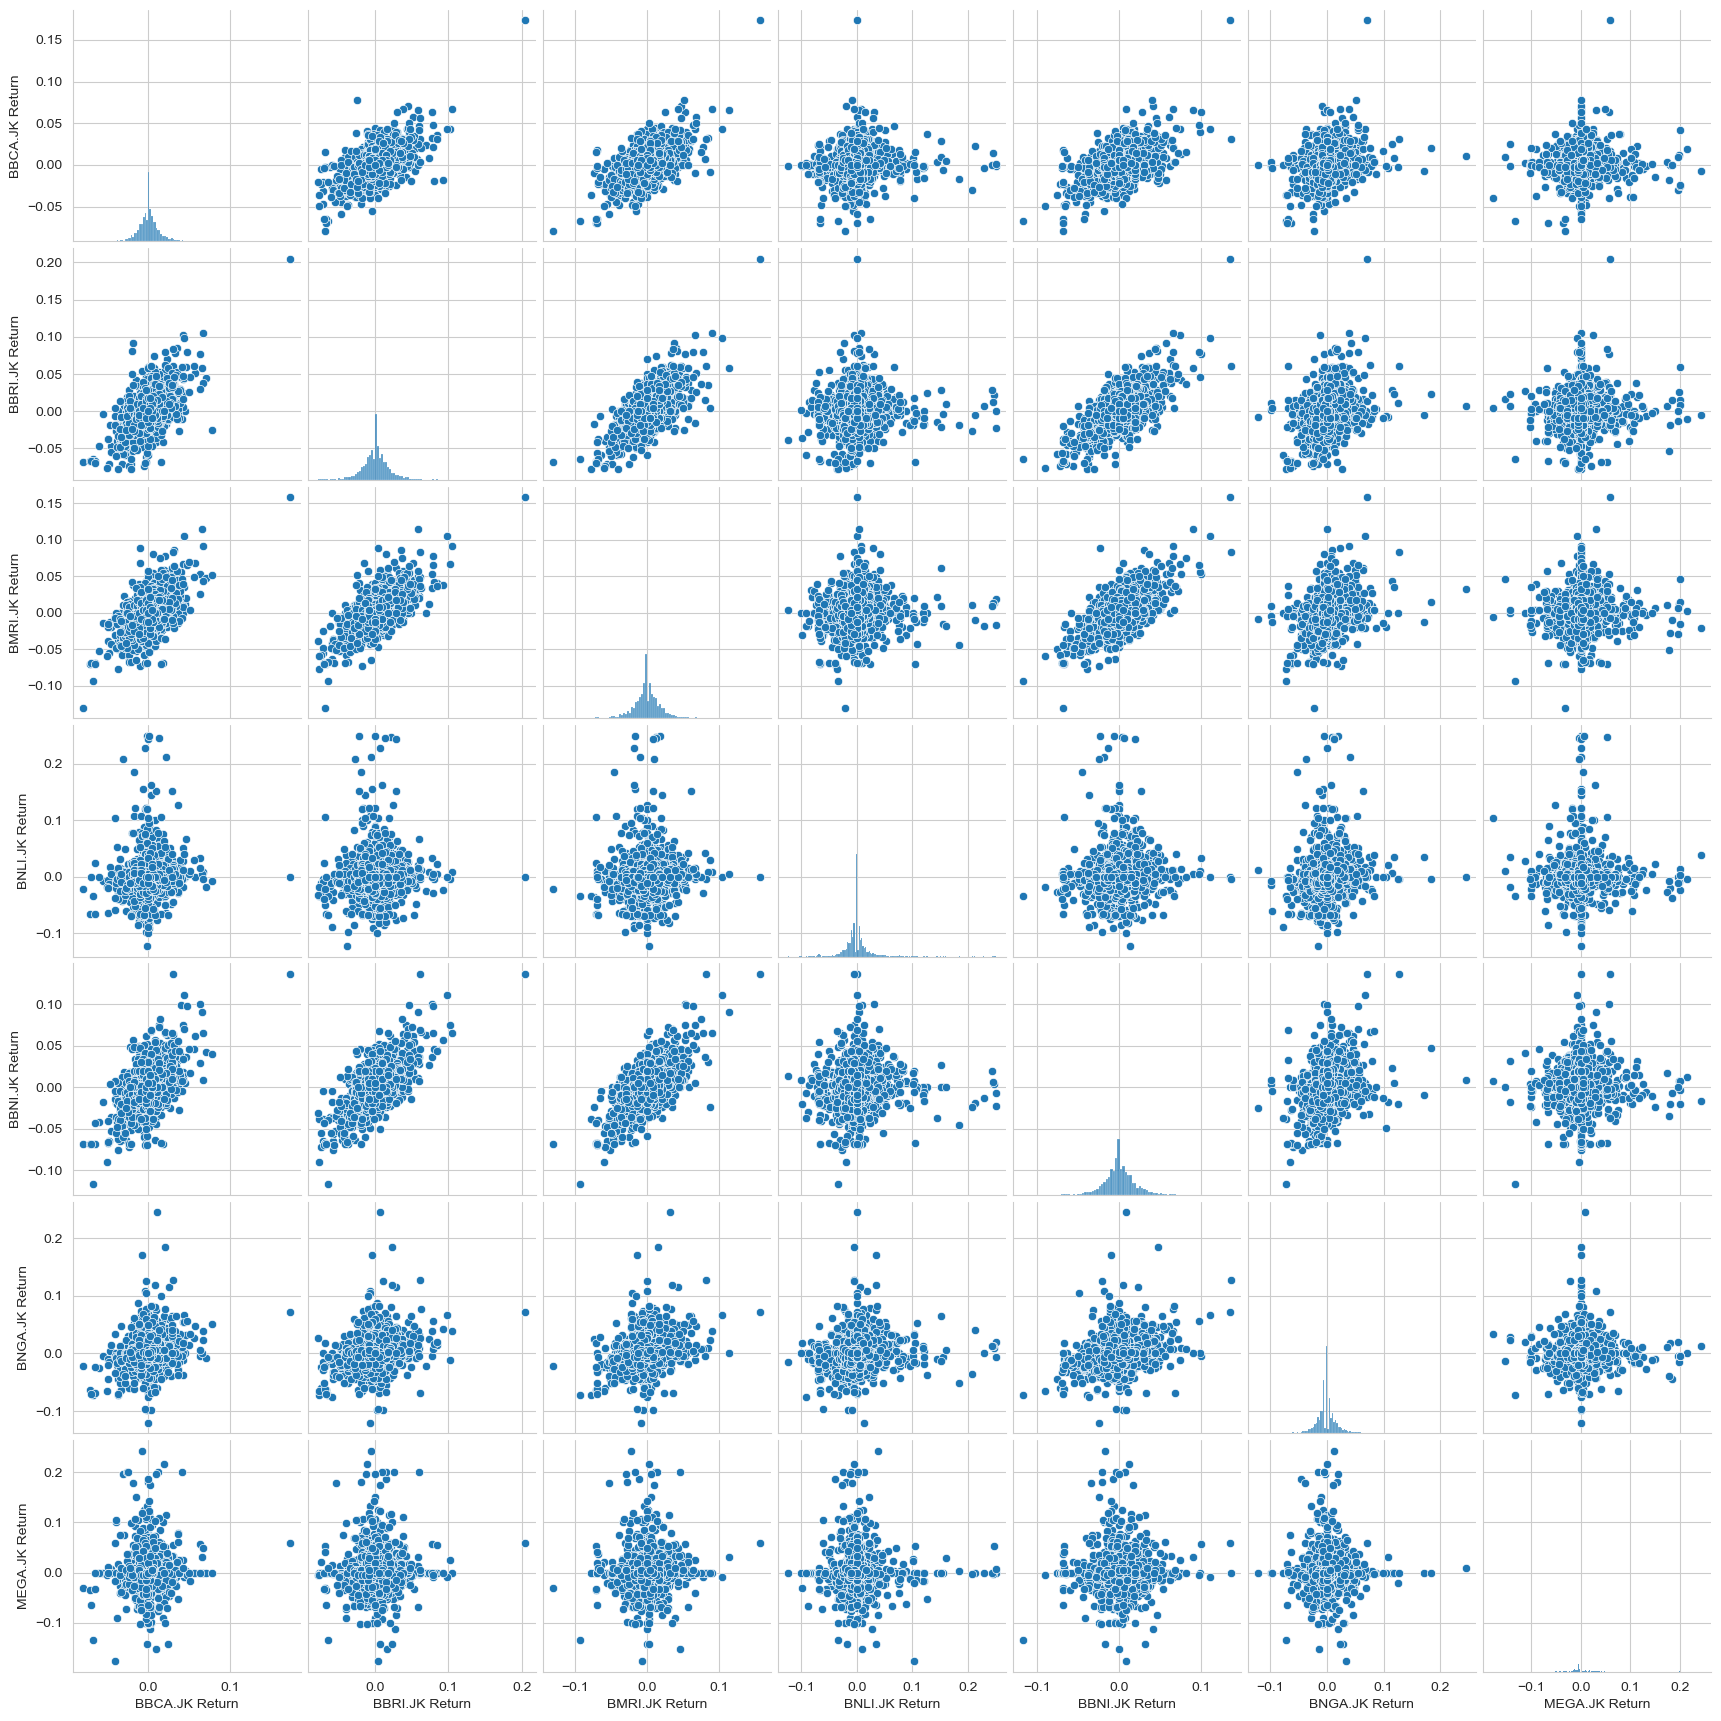

In [311]:
# using pairplot to identify correlations, trends, and distribution patterns of each bank stocks

sns.pairplot(returns)

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

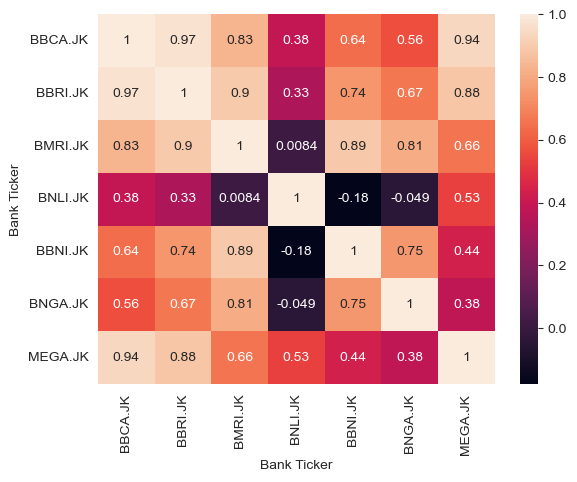

In [313]:
# using heatmap to shows the strength of the correlation between different bank stocks, highlighting which stocks move together and which do not

sns.heatmap(df_stock.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

## How is the Close price trendline using Pyplot?

C:\Users\Lenovo\Downloads\Anaconda2024\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



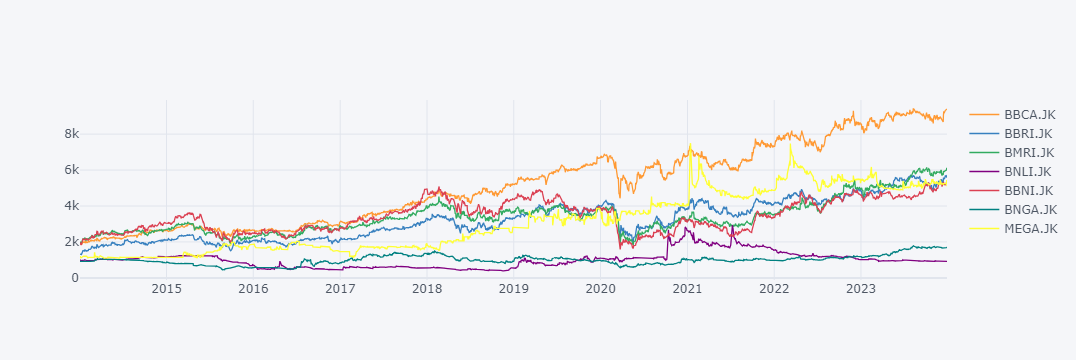

In [322]:
# using plotly to detailed and interactive exploration of Close price stock
df_stock.xs(key='Close',axis=1,level='Stock Info').iplot()

## Summary

1. The range of maximum Close price is 1,790 - 9,400 and the minumum is 440 - 1,865
2. Most of the minimum and maximum returns of all the bank stocks are occurred in 2020
3. The highest return came from MEGA 0.095% compared to all the bank stocks
4. Based on the standard deviation, the most volatile or riskiest bank stock is MEGA (2.72%). Meanwhile the most stable is BBCA (1.45%)
5. If we look at the Heatmap Correlation between each of the stocks, BBCA has a positive correlation with BBRI (0.97), MEGA (0.94), and BMRI (0.83) which means that if BBCA increases, they would also tend to increase. But, if we look at the Pairplot Visualization, it can be said that BBCA has a linear positive correlation with BBRI, BMRI, and BBNI. So, if we compare it with MEGA it is more spread out.